# 결정 트리

## 로지스틱 회귀로 와인 분류하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

와인 데이터를 먼저 불러오자. 앞에서 열 3개는 각각 알코올 도수,당도,PH 값을 나타낸다. 네번째 열은 타깃값으로 0이면 레드와인 1이면 화이트 와인이다. 

In [2]:
wine = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/wine.csv')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


레드 와인과 화이트 와인을 구분하는 이진 분류 문제이고, 화이트 와인이 양성 클래스이다. 즉 전체 와인에서 화이트 와인을 골라내는 문제이다. 

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


출력 결과를 보면 총 6497개의 샘플이 있고 누락된 값은 없는 것 같다.

In [4]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


array([[<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'sugar'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'class'}>]], dtype=object)

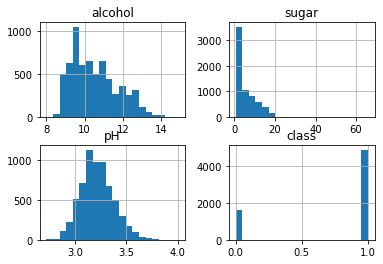

In [5]:
wine.hist(bins=20)

In [4]:
wine.isna().sum()

alcohol    0
sugar      0
pH         0
class      0
dtype: int64

In [5]:
wine['class'].unique()

array([0., 1.])

In [6]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


평균, 표준편차, 최소, 최대값과 중간값, 1사분위수, 3사분위수를 알려준다. 여기서 알 수 있는 것은 알코올 도수와 당도, PH 값의 스케일이 다르다는 것이다. 이전에 배웠던 사이킷런의 StandardScaler 클래스를 사용해 특성을 표준화하자. 


## 학습/검증 세트

데이터프레임을 넘파이 배열로 바꾸고 훈련 세트와 테스트 세트로 나누자.

train_test_split() 함수는 설정값을 지정하지 않으면 25%를 테스트 세트로 지정한다. 샘플개수가 충분히 많으므로 20% 정도만 테스트 세트로 나누었다. 코드의 test_size=0.2가 이런 의미이다.

In [8]:
data=wine.drop(['class'],axis=1).values
target=wine['class'].values

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=.2, random_state=50)

X_train.shape,X_test.shape

((5197, 3), (1300, 3))

In [7]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


알코올 도수와 당도, PH 값의 스케일이 다른 범위 값을 StandardScaler 클래스를 사용해 특성을 표준화하자. 

In [11]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(X_train)

X_train_scaled=ss.transform(X_train)
X_test_scaled=ss.transform(X_test)

type(X_test_scaled),type(X_train_scaled)

(numpy.ndarray, numpy.ndarray)

In [12]:
X_train_scaled.min(),X_train_scaled.max()

(np.float64(-3.1001913471615157), np.float64(12.606190751704741))

In [13]:
X_train_scaled, X_train

(array([[ 1.10159051,  1.78606065, -0.48391833],
        [ 0.34441745, -0.84586288,  0.69963374],
        [-0.83340731,  1.18030048,  1.26026368],
        ...,
        [ 1.10159051, -0.76230975,  0.38817267],
        [-0.83340731, -0.92941601, -1.35600934],
        [ 1.10159051, -0.78319804,  0.45046489]], shape=(5197, 3)),
 array([[11.8 , 14.  ,  3.14],
        [10.9 ,  1.4 ,  3.33],
        [ 9.5 , 11.1 ,  3.42],
        ...,
        [11.8 ,  1.8 ,  3.28],
        [ 9.5 ,  1.  ,  3.  ],
        [11.8 ,  1.7 ,  3.29]], shape=(5197, 3)))

이제 표준점수로 변환된 train_scaled와 test_scaled를 사용해 로지스틱 회귀 모델을 훈련하자.



In [ ]:
from sklearn.linear_model import LogisticRegression


0.7808350971714451
0.7776923076923077


In [14]:
from sklearn.linear_model import LogisticRegression

lr_clf=LogisticRegression()
lr_clf.fit(X_train_scaled,y_train)

print('Train Score :', lr_clf.score(X_train_scaled,y_train))
print('Test Score :', lr_clf.score(X_test_scaled,y_test))


Train Score : 0.7796805849528574
Test Score : 0.7853846153846153


점수가 높지 않다. ***훈련 세트와 테스트 세트의 점수가 모두 낮아서 모델이 과소적합*** 이라 볼 수 있다.이 문제를 해결하기 위해 규제 매개 변수 C의 값을 바꾸던지 solver 매개변수에서 다른 알고리즘을 선택할 수도 있다. 또한 다항 특성을 만들어 추가할 수도 있다.

### 설명하기 쉬운 모델과 어려운 모델

로지스틱 회귀가 학습한 계수와 절편을 출력해 보자.

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [15]:
lr_clf.coef_,lr_clf.intercept_

(array([[ 0.52119637,  1.6623573 , -0.69600674]]), array([1.76817573]))

사실 이 모델이 왜 저런 계수 값을 학습했는지 정확히 이해하기 어렵다. 

아마도 알코올 도수와 당도가 높을수록 화이트 와인일 가능성이 높고, PH가 높을수록 레드 와인일 가능성이 높은 것 같다. 하지만 정확히 이 숫자가 어떤 의미인지 설명하긴 어렵다. 더군다나 다항 특성을 추가한다면 설명하기가 더 어려울 것이다. 대부분 러닝머신 모델은 이렇게 학습의 결과를 설명하기 어렵다. 쉬운 방법으로 설명할 수 있는 모델을 알아보자.

## 결정 트리

결정 트리 모델이 이유를 설명하기가 쉽다. 결정 트리 모델은 스무고개와 같다. 데이터를 잘 나눌 수 있는 질문을 찾는다면 계속 질문을 추가해서 분류 정확도를 높일 수 있다. 사이킷런의 DecisionTreeClassifier 클래스를 사용해 결정 트리 모델을 훈련해 보자. fit() 메서드를 호출해서 모델을 훈련한 다음 score() 메서드로 정확도를 평가해 보자.

In [ ]:
from sklearn.tree import DecisionTreeClassifier





0.996921300750433
0.8592307692307692


In [16]:
from sklearn.tree import DecisionTreeClassifier

dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train_scaled,y_train)

print('Train Score :', dt_clf.score(X_train_scaled,y_train))
print('Test Score :', dt_clf.score(X_test_scaled,y_test))

Train Score : 0.9974985568597268
Test Score : 0.8653846153846154


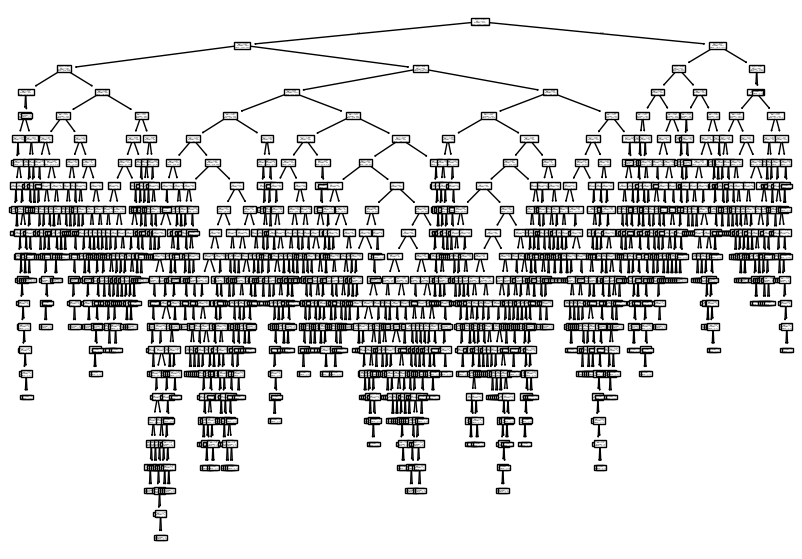

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt_clf)
plt.show()

너무 복잡하니 plot_tree() 함수에서 트리의 깊이를 제한해서 출력해 보자. 

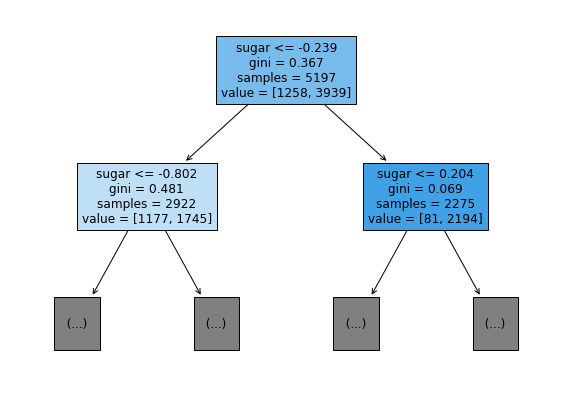

In [ ]:
plt.figure(figsize=(10,7))


plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

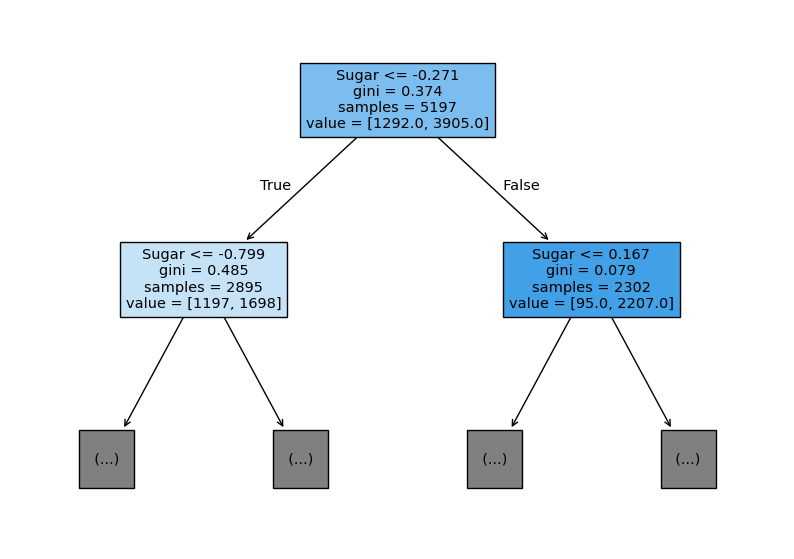

In [18]:
plt.figure(figsize=(10,7))
plot_tree(dt_clf,max_depth=1,filled=True,feature_names=['Alchole','Sugar','pH'])
plt.show


이번엔 노드 상자 안에 있는 gini에 대해 알아보자.

### - 불순도

gini는 지니 불순도(gini impurity)를 의미한다. DecisionTreeClassifier 클래스의 criterion 매개변수의 기본값이 gini이다. creterion 매개변수의 용도는 노드에서 데이터를 분할할 기준을 정하는 것이다. 앞의 루트 노드에서 -0.239를 기준으로 왼쪽과 오른쪽 노드로 나누었다. 나눈 방법은 바로 criterion 매개변수에 지정한 지니 불순도를 사용한 것이다. 지니 불순도는 클래스의 비율을 제곱해서 더한 다음 1에서 빼면된다.

지니 불순도 = 1 - (음성 클래스 비율의 제곱 + 양성 클래스 비율의 제곱)


### - 엔트로피

엔트로피(Entropy)는 불순도(Impurity)를 수치적으로 나타낸 척도입니다. 엔트로피가 높다는 것은 불순도가 높다는 뜻이고, 엔트로피가 낮다는 것은 불순도가 낮다는 뜻입니다. 엔트로피가 1이면 불순도가 최대입니다

불순도/엔트로피 참고: https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-4-%EA%B2%B0%EC%A0%95-%ED%8A%B8%EB%A6%ACDecision-Tree

## - 가지치기

예를 들어 열매를 잘 맺기 위해 과수원에서 가지치기를 하는 것처럼 결정 트리도 가지치기를 해야 한다. 그렇지 않으면 무작정 끝까지 자라나는 트리가 만들어진다. 훈련 세트에는 아주 잘 맞겠지만 테스트 세트에서 점수는 그에 못 미칠 것이다. 이것을 일반화가 잘 되지 않았다고 한다.

이제 가지치기를 해보자. 결정 트리에서 가지치기를 하는 가장 간단한 방법은 자라날 수 있는 트리의 최대 깊이를 지정하는 것이다. DecisionTreeClassifier 클래스의 max_depth 매개변수를 3으로 지정하여 모델을 만들어 보자.

0.8454877814123533
0.8415384615384616


In [19]:
dt_clf2=DecisionTreeClassifier(max_depth=3,random_state=50)
dt_clf2.fit(X_train_scaled,y_train)

print('Train Score :',dt_clf2.score(X_train_scaled,y_train))
print('Test Score :',dt_clf2.score(X_test_scaled,y_test))

Train Score : 0.8454877814123533
Test Score : 0.8515384615384616


훈련 세트의 성능은 낮아졌지만 테스트 세트의 성능은 거의 그대로이다. plot_tree() 함수로 그려보자.

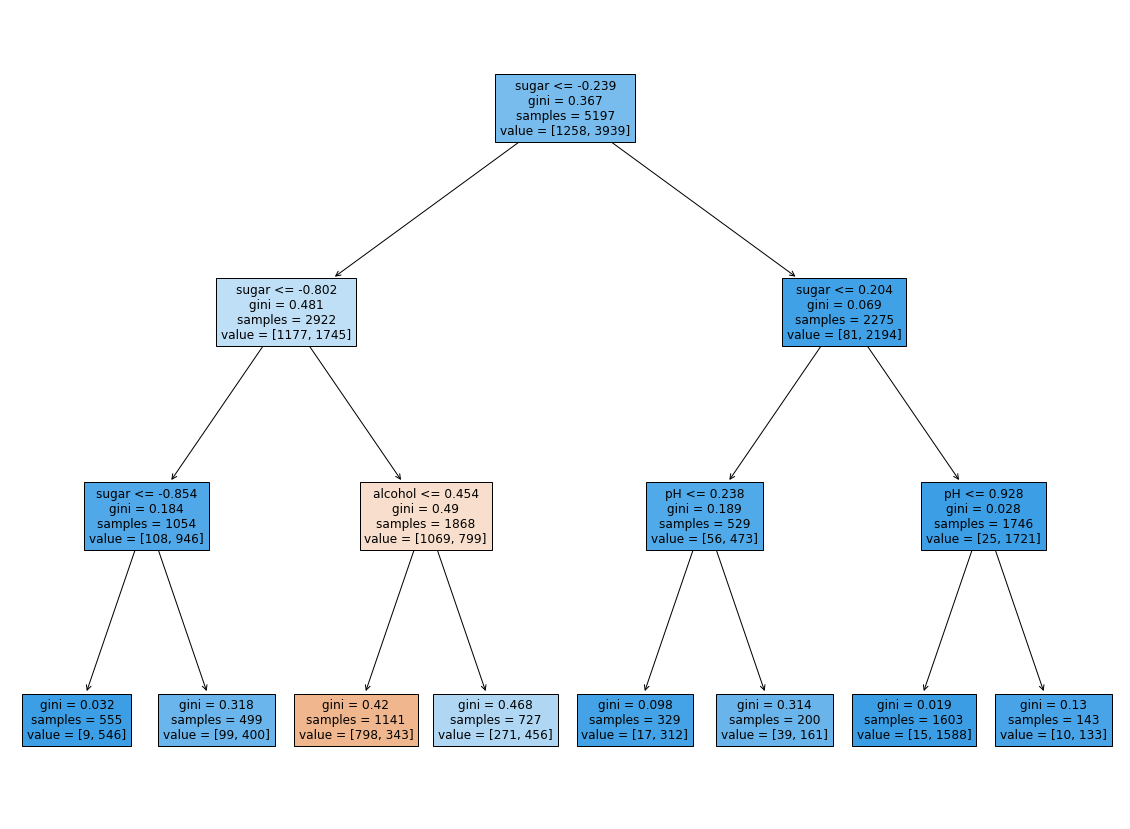

In [ ]:
plt.figure(figsize=(20,15))


plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

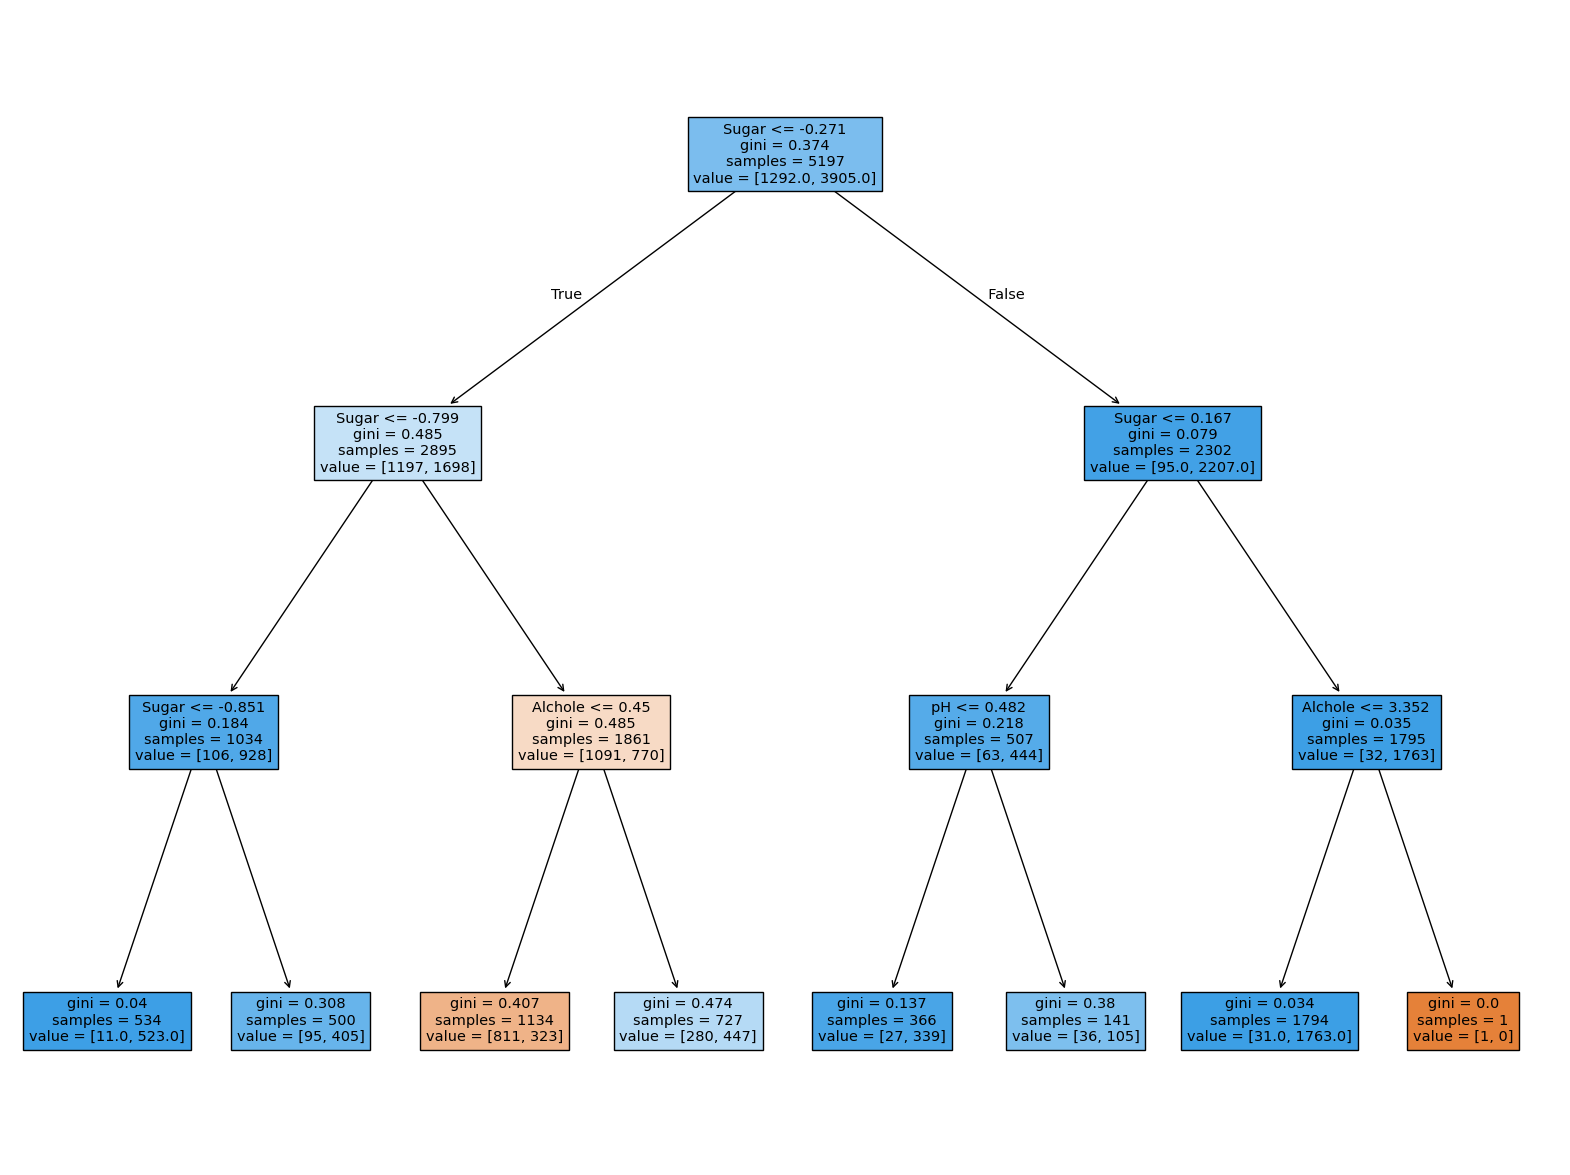

In [21]:
plt.figure(figsize=(20,15))
plot_tree(dt_clf2,max_depth=3,filled=True,feature_names=['Alchole','Sugar','pH'])
plt.show

## - 전처리 필요 없는 결정트리

앞서 불순도를 기준으로 샘플을 나눈다고 했다. 불순도는 클래스별 비율을 가지고 계산하였다. 샘플을 어떤 클래스 비율로 나누는지 계산할 때 특성값의 스케일이 계산에 영향을 미칠까? 아니다. 특성값의 스케일은 결정 트리 알고리즘에 아무런 영향을 미치지 않는다. 따라서 표준화 전처리를 할 필요가 없다. 이것이 결정 트리 알고리즘의 또 다른 장점 중 하나이다.

그럼 앞서 전처리하기 전의 훈련 세트와 테스트 세트로 결정 트리모델을 다시 훈련해 보자.

0.8454877814123533
0.8415384615384616


In [23]:
dt_clf3=DecisionTreeClassifier(max_depth=3,random_state=50)
dt_clf3.fit(X_train,y_train)
print('Train Score :',dt_clf3.score(X_train,y_train))
print('Test Score :',dt_clf3.score(X_test,y_test))

Train Score : 0.8454877814123533
Test Score : 0.8515384615384616


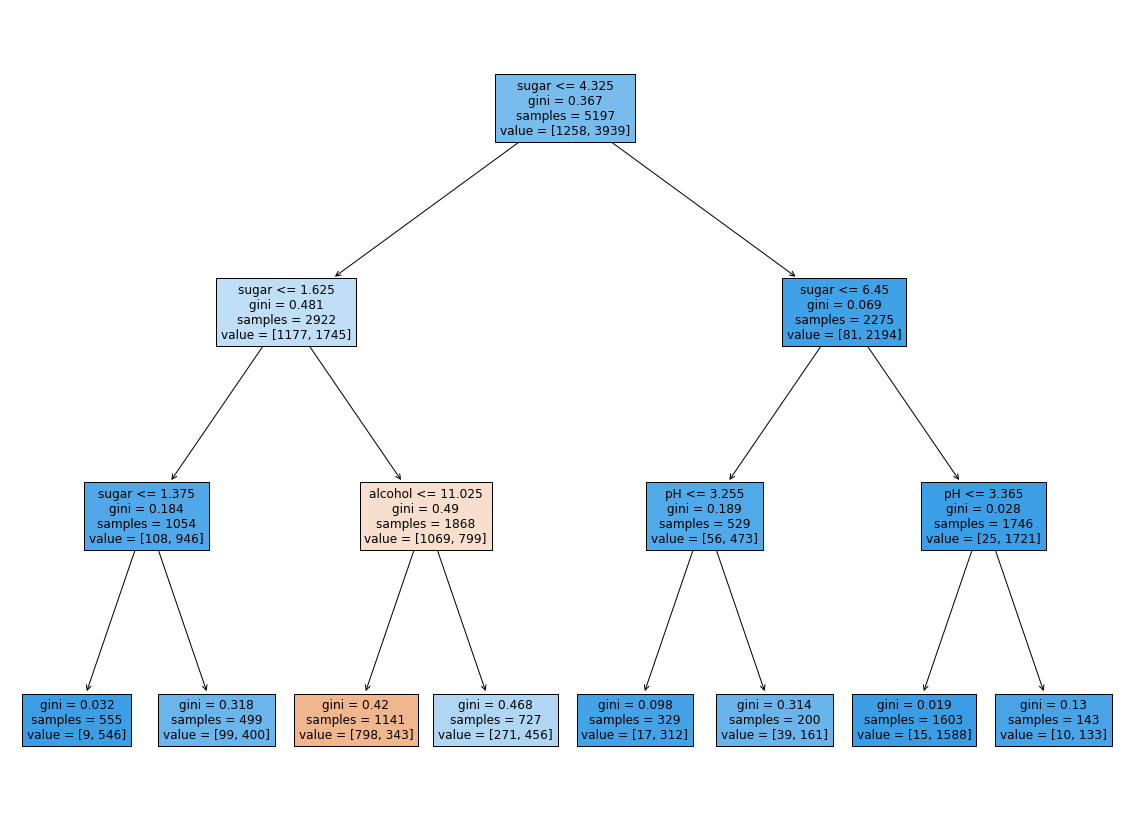

In [ ]:
plt.figure(figsize=(20,15))


plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

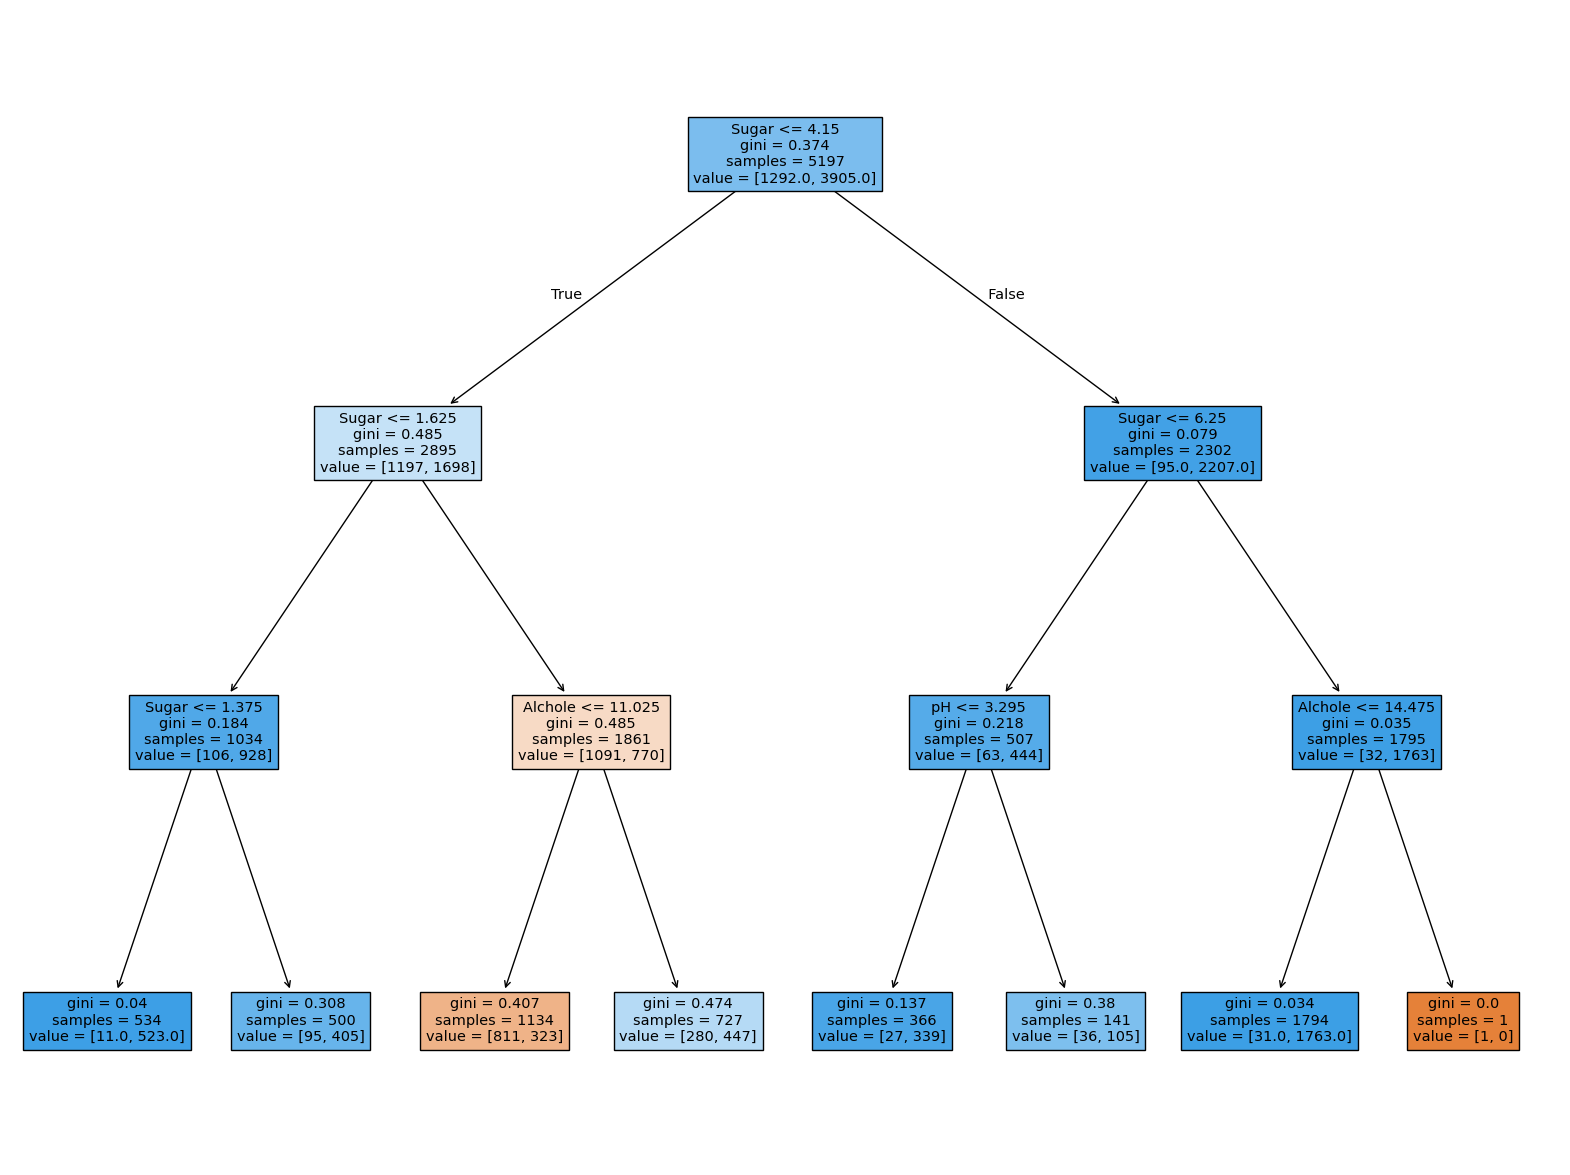

In [24]:
plt.figure(figsize=(20,15))
plot_tree(dt_clf3,max_depth=3,filled=True,feature_names=['Alchole','Sugar','pH'])
plt.show

결과를 보면 같은 트리지만, 특성값을 표준점수로 바꾸지 않은 터라 이해하기가 훨씬 쉽다. 당도가 1.625보다 크고 4.325보다 작은 와인중 알코올 도수가 11.025와 같거나 작은 것이 레드 와인이다. 그 이외에는 모두 화이트 와인으로 예측했다.


#### 특성 중요도

마지막으로 결정 트리는 어떤 특성이 가장 유용한지 나타내는 특성 중요도를 계산해 준다. 이 트리의 루트 노드와 깊이 1에서 sugar를 사용했기 때문에 아마도 sugar가 가장 유용한 특성중 하나일 것 같다. 특성 중요도는 결정 트리 모델의 featureimportances 속성에 저장되어 있다. 이 값을 출력해 보자.

[0.12345626 0.86862934 0.0079144 ]


In [25]:
dt_clf3.feature_importances_

array([0.12376637, 0.86779661, 0.00843702])

역시 두 번째 특성인 sugar가 0.87 정도로 특성 중요도가 가장 높다. 특성 중요도는 각 노드의 정보 이득과 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산한다. 특성 중요도를 활용하면 결정 트리 모델을 특성 선택에 활용할 수 있다. 이것이 결정 트리 알고리즘의 또 다른 장점중 하나이다.

## 예)

불순물 기준을 변경해 보자

In [ ]:



print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8874350586877044
0.8615384615384616


In [26]:
dt_clf4=DecisionTreeClassifier(min_impurity_decrease=0.0005,random_state=50)
dt_clf4.fit(X_train,y_train)
print('Train Score :',dt_clf4.score(X_train,y_train))
print('Test Score :',dt_clf4.score(X_test,y_test))

Train Score : 0.8851260342505292
Test Score : 0.8592307692307692


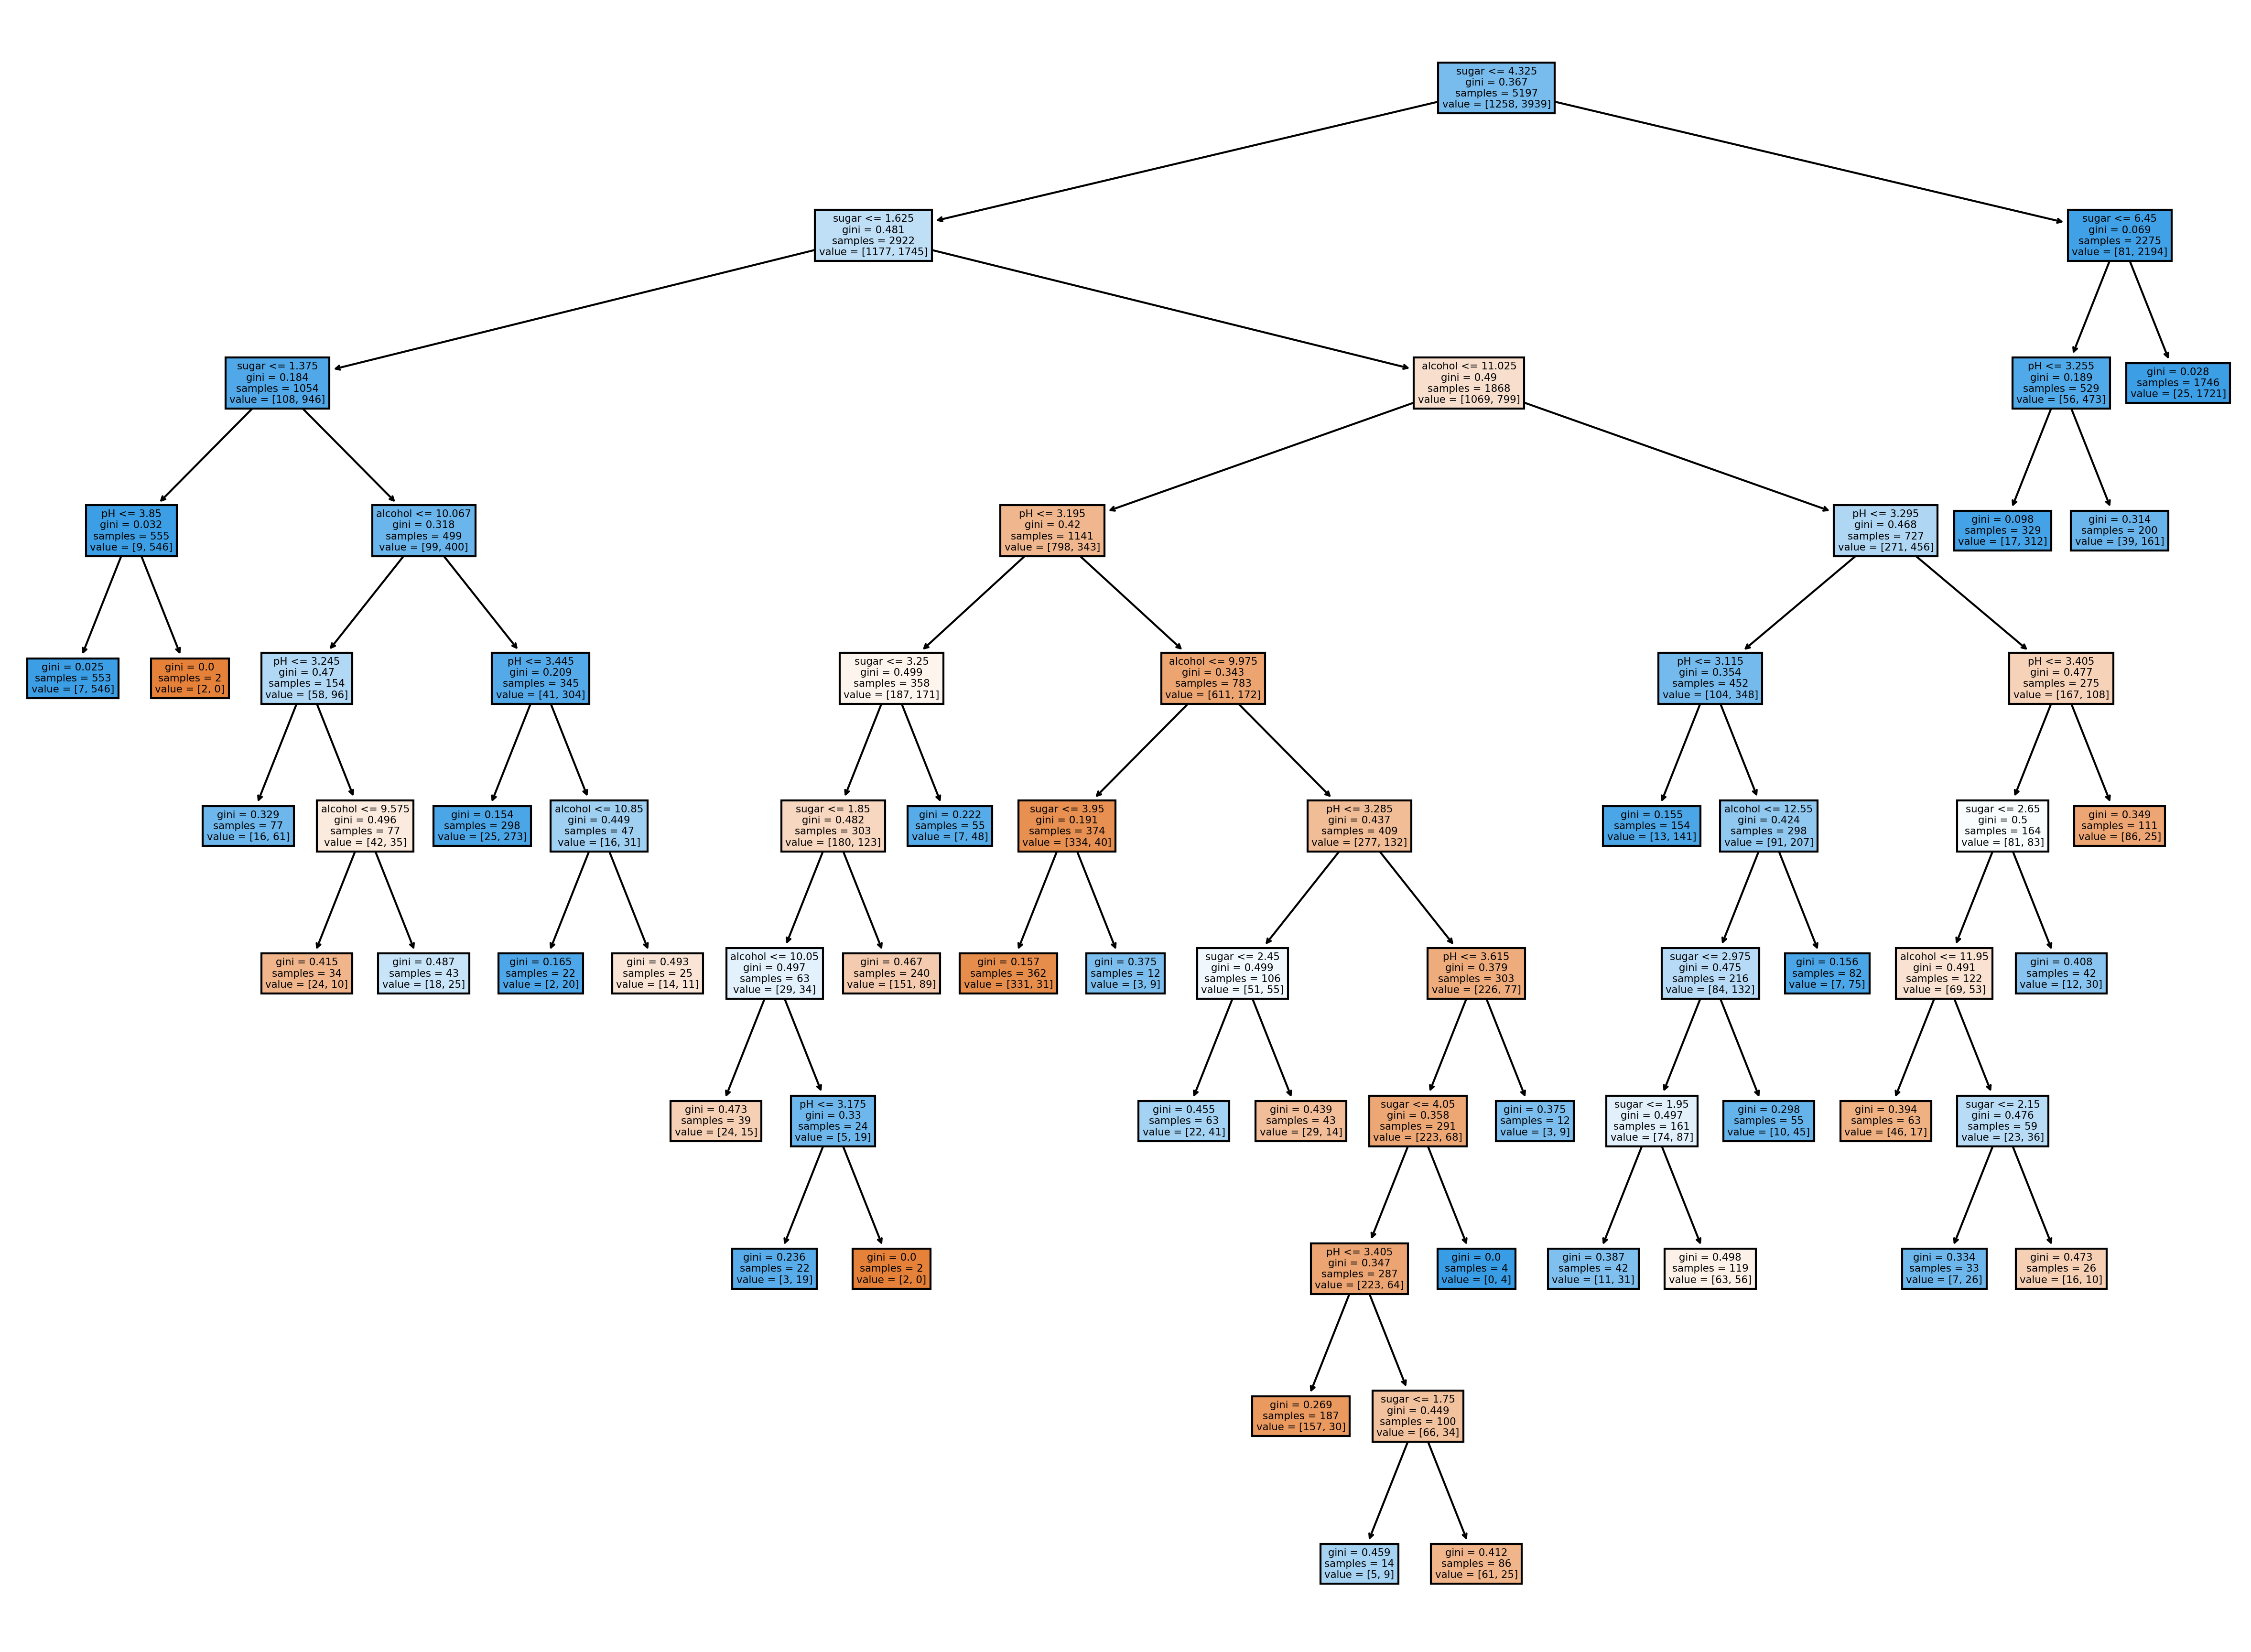

In [ ]:
plt.figure(figsize=(20,15), dpi=300)


plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

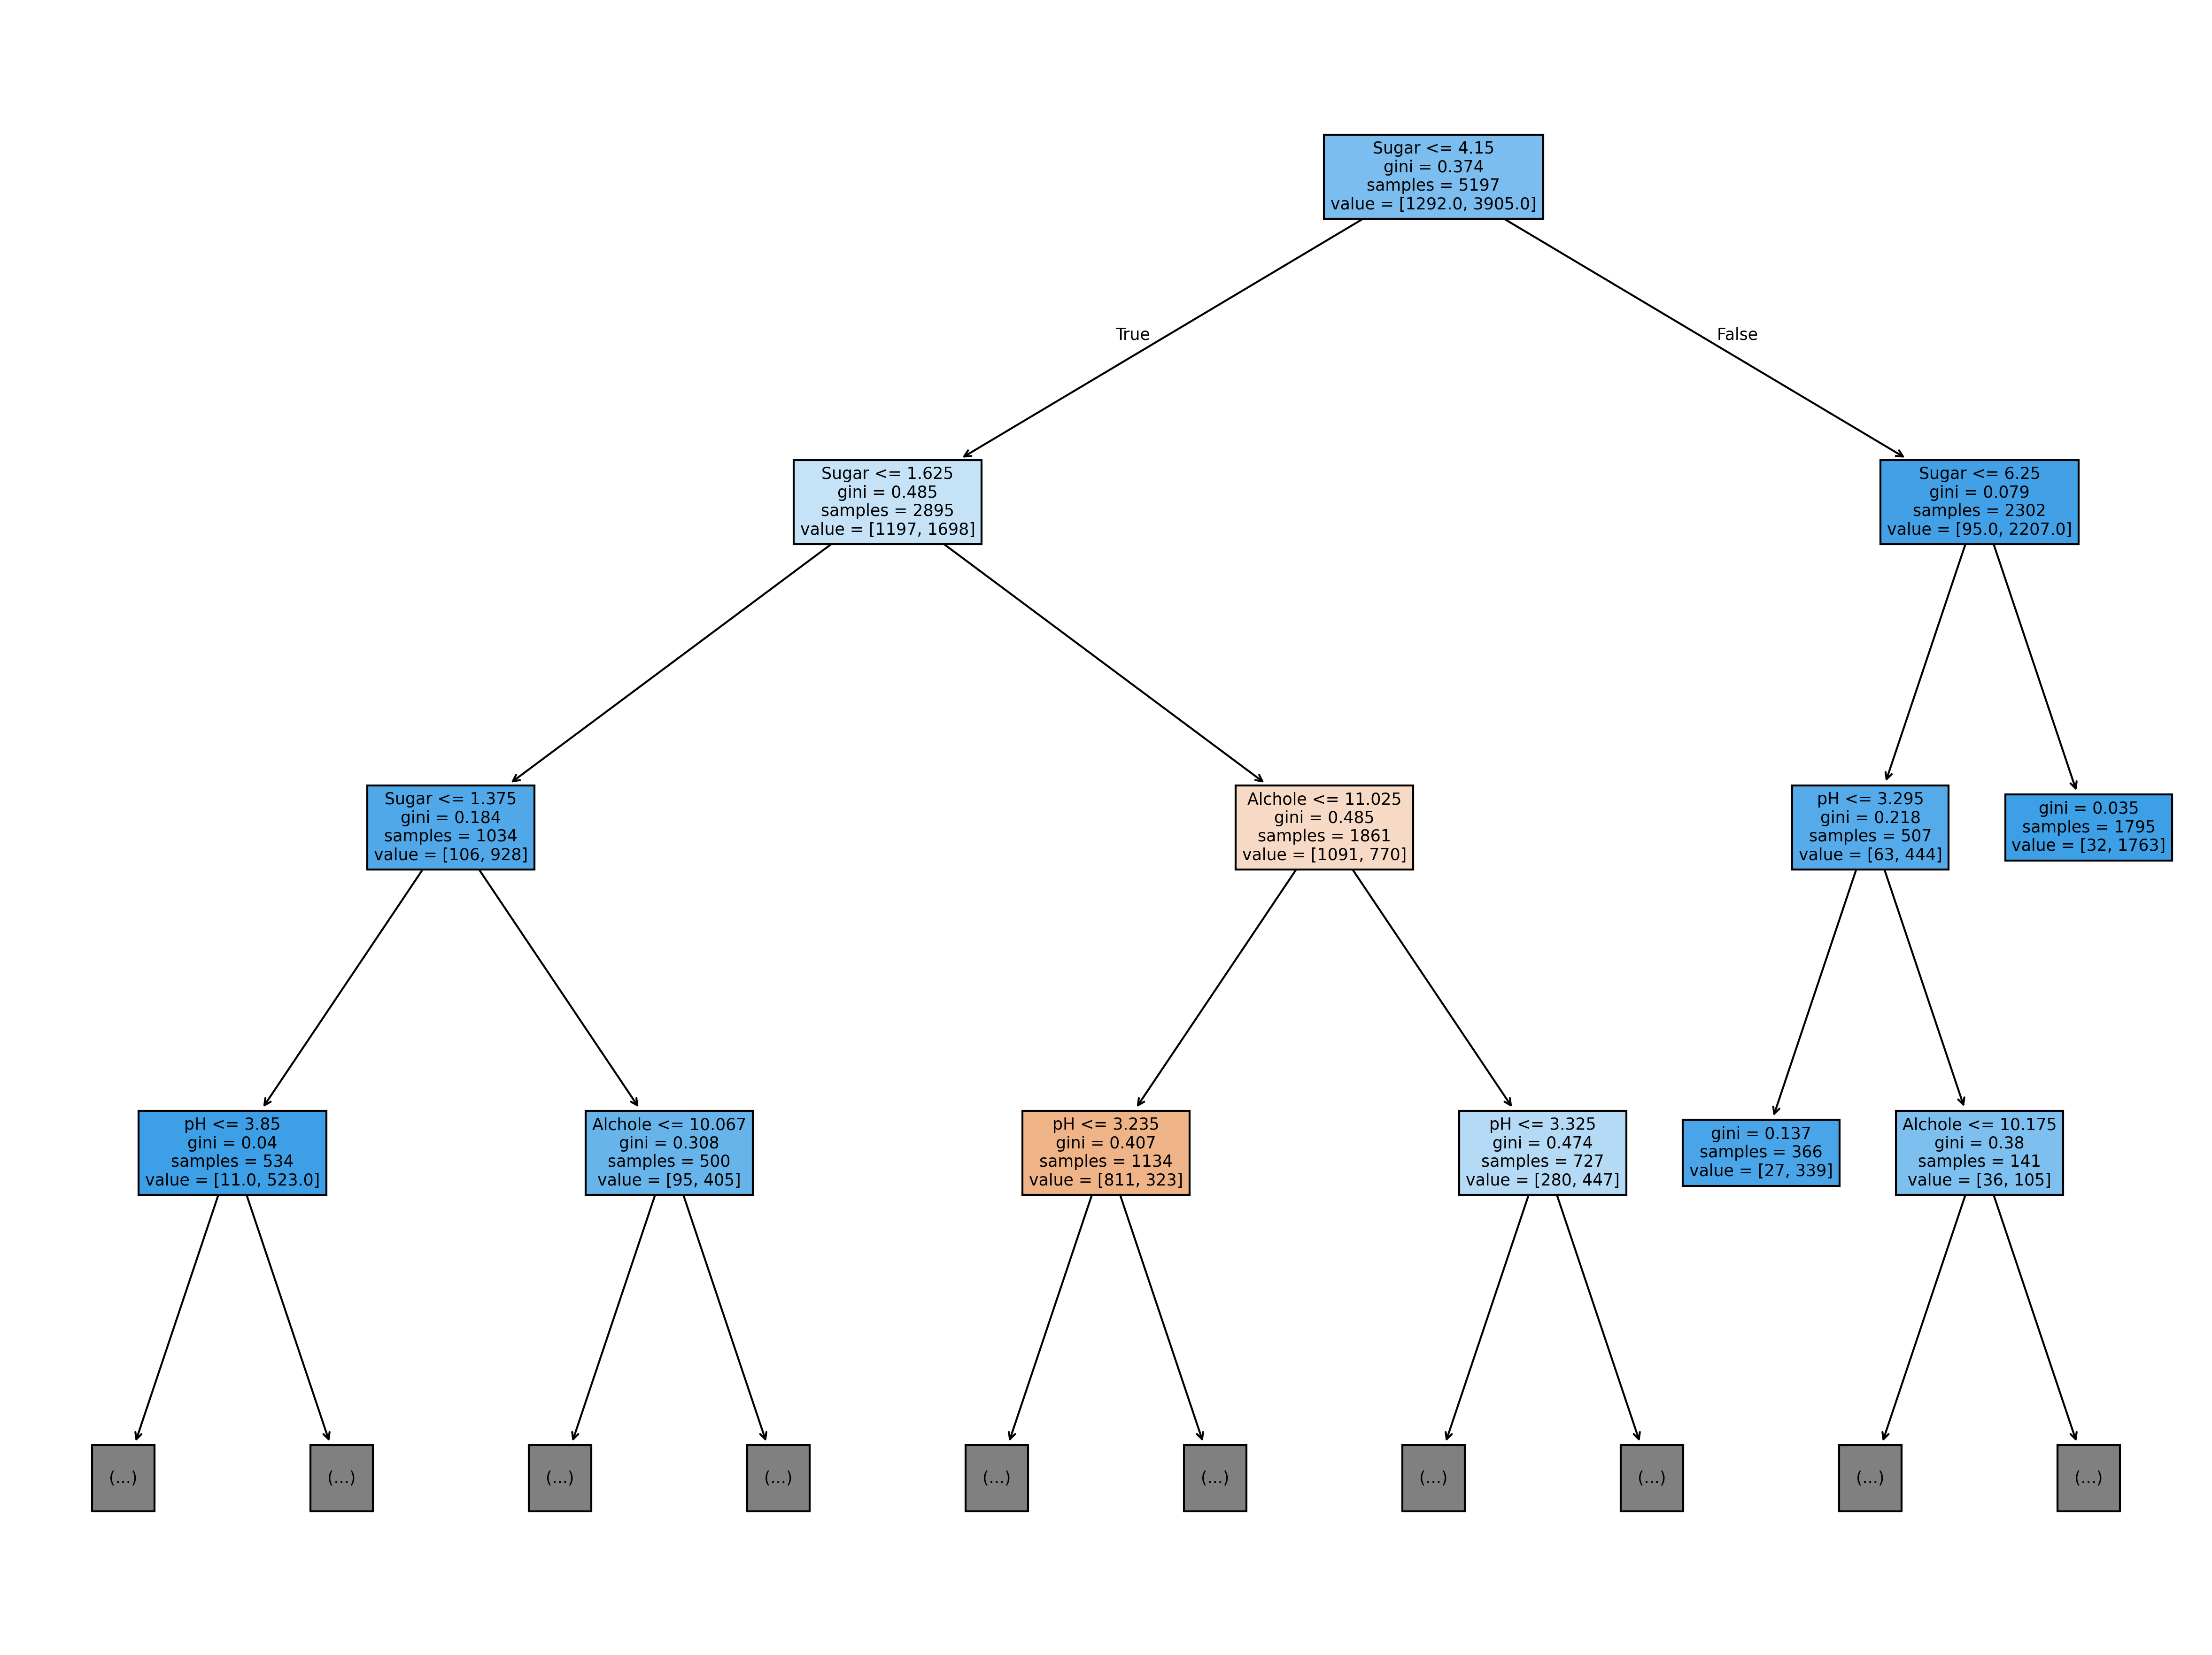

In [28]:
plt.figure(figsize=(20,15),dpi=300)
plot_tree(dt_clf4,max_depth=3,filled=True,feature_names=['Alchole','Sugar','pH'])
plt.show

---

참고
 - 혼자 공부하는 머신러닝+딥러닝